# `matrixprofile` Example

## Preamble

Below we will analyze NYC Taxi Data between 2014-07-01 and 2015-01-31.

During this period, there are **5 known anomalies**:
1. **NYC Marathon** - 2014-11-02
1. **Thanksgiving** - 2014-11-27
1. **Christmas** - 2014-12-25
1. **New Years** - 2015-01-01
1. **Snow Blizzard** - 2015-01-26 and 2015-01-27

In [1]:
import matrixprofile as mp

from matplotlib import pyplot as plt
# %matplotlib inline

## Load Sample Data

In [2]:
taxi = mp.datasets.load('nyc-taxi-anomalies')
ts = taxi['data']

## Analyze

/opt/conda/lib/python3.9/site-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/opt/conda/lib/python3.9/site-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/opt/conda/lib/python3.9/site-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


CPU times: user 15min 31s, sys: 4.75 s, total: 15min 35s
Wall time: 3min 51s


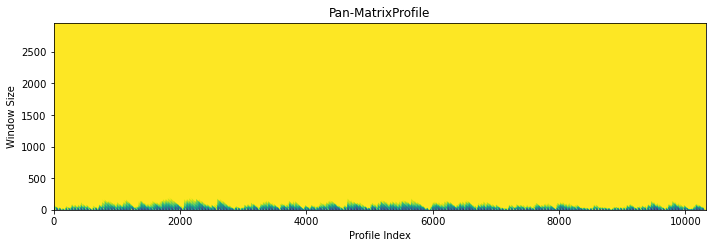

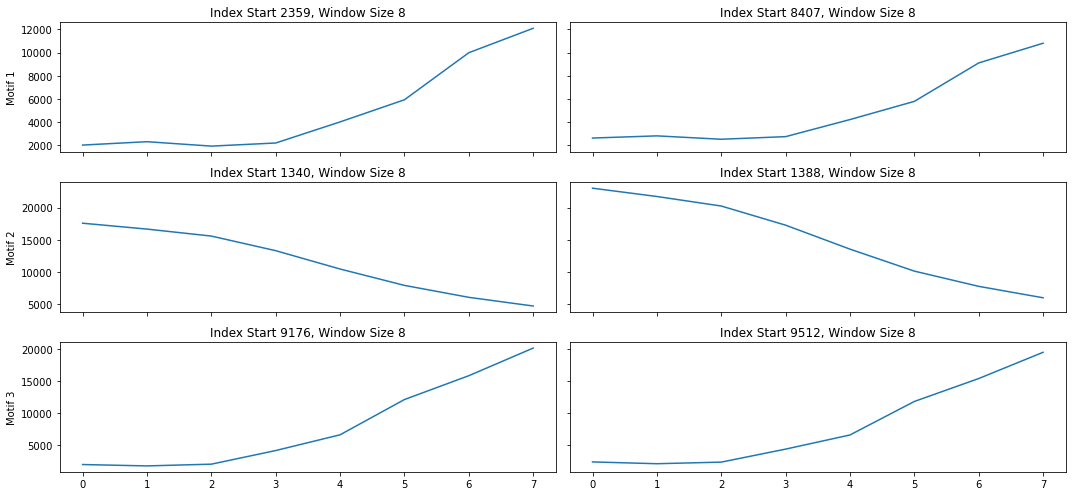

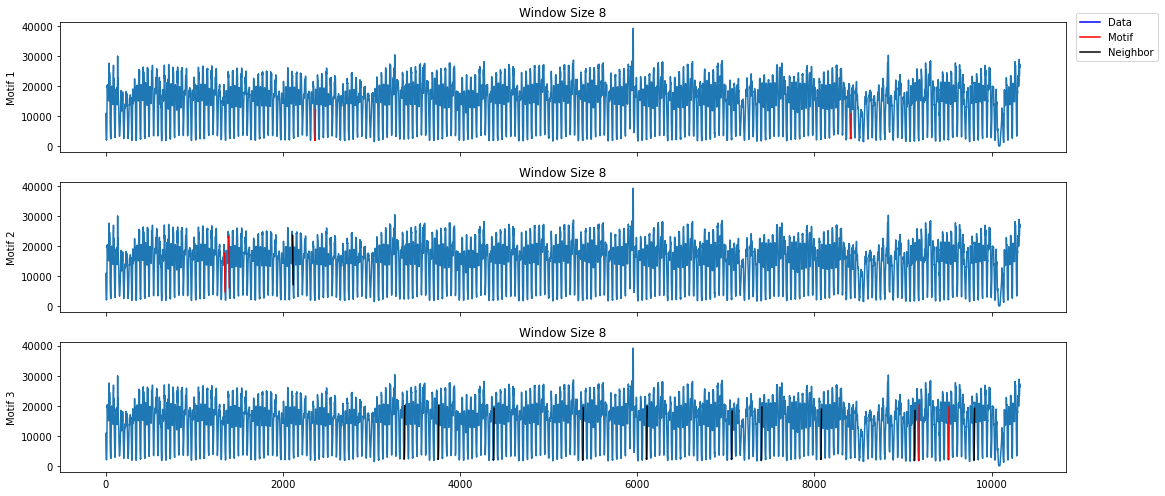

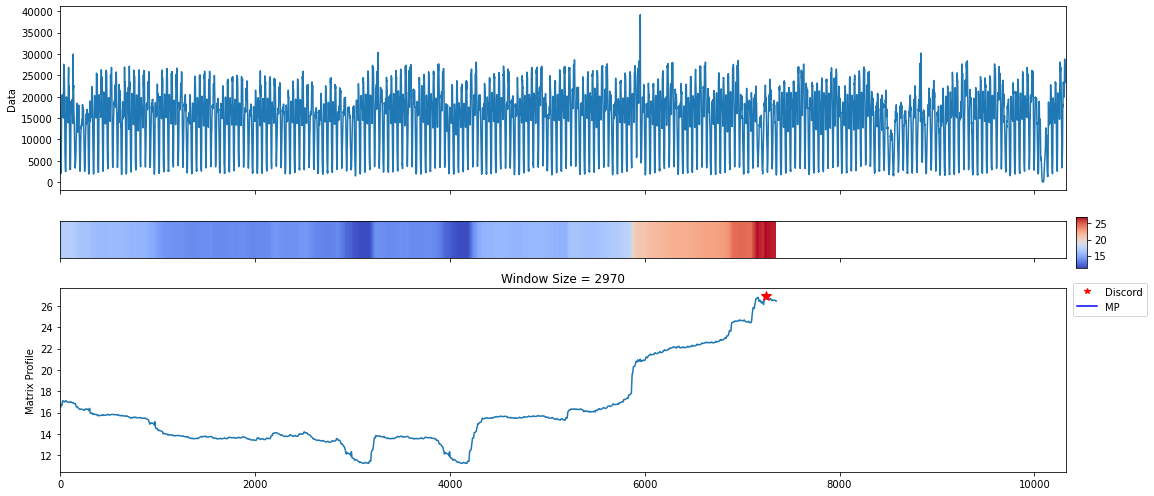

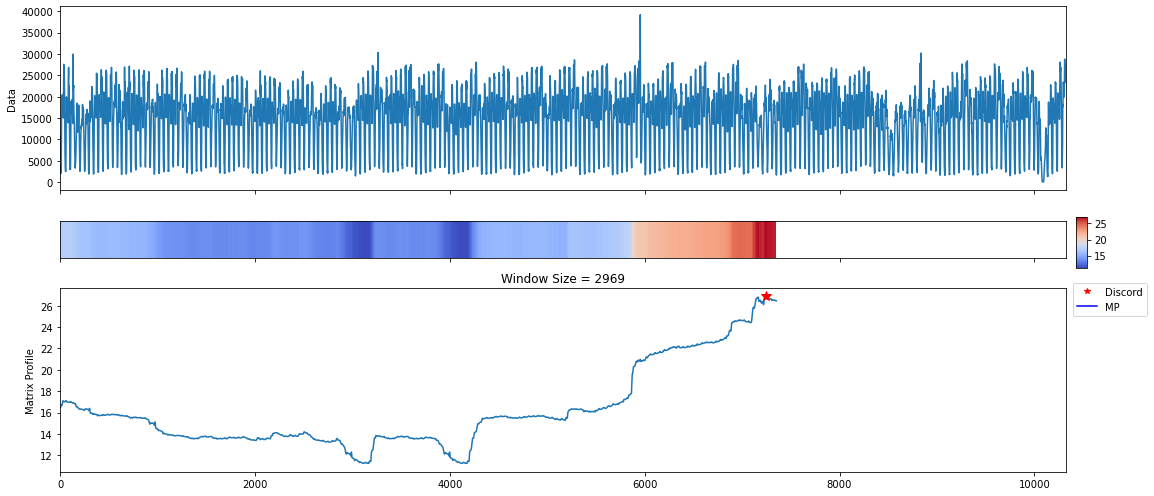

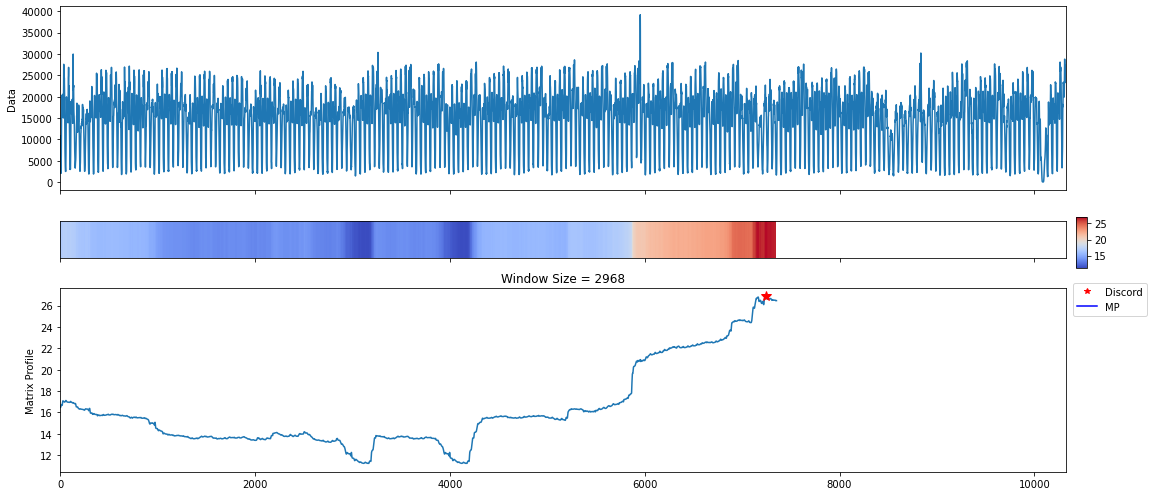

In [3]:
%%time
# run analyze on all cpu cores
profile, figures = mp.analyze(ts, n_jobs=-1)

In [4]:
daily_window = 48 # note that our interval is in 30 minutes
daily_profile = mp.utils.pick_mp(profile, daily_window)

# find discords using a weekly exclusion zone
daily_profile = mp.discover.discords(daily_profile, k=5, exclusion_zone=daily_window*7)

/opt/conda/lib/python3.9/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


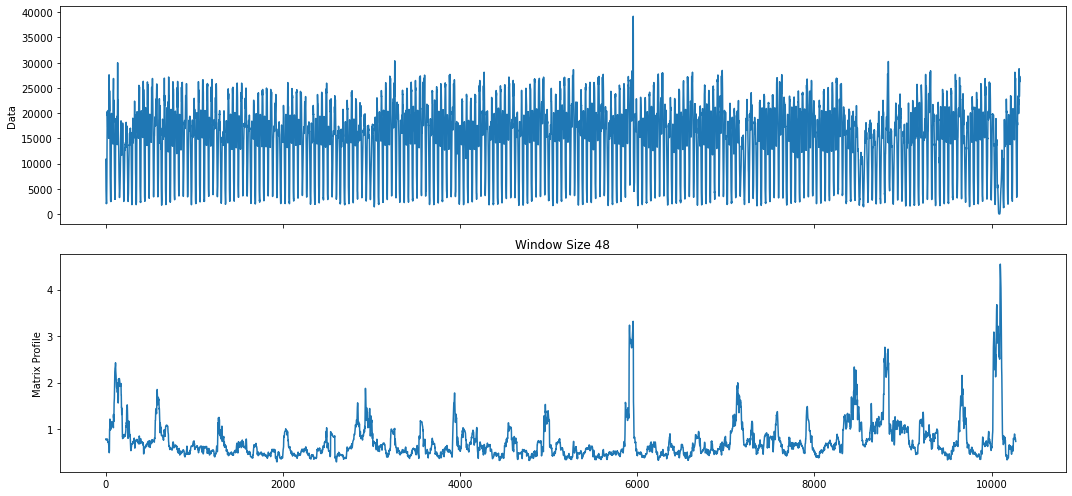

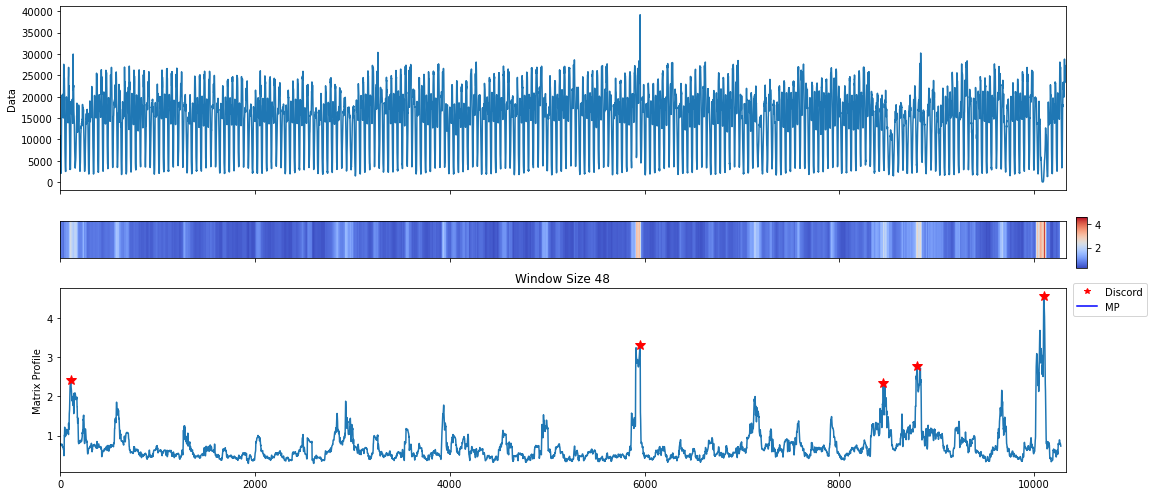

In [5]:
figures = mp.visualize(daily_profile)

### Results
Note below, the red stars / dates are very close to the claims of known anomalies in the 'Preamble' section.

In [6]:
taxi['datetime'][daily_profile['discords']]

array(['2015-01-27T09:00:00', '2014-11-02T00:30:00',
       '2014-12-31T05:30:00', '2014-07-03T07:00:00',
       '2014-12-24T00:30:00'], dtype='datetime64[s]')

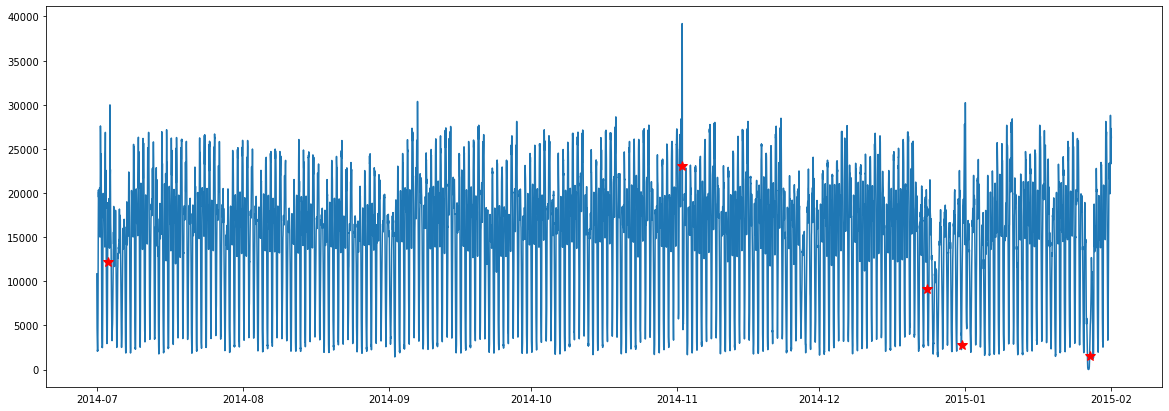

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(taxi['datetime'], taxi['data'])
for discord in daily_profile['discords']:
    dt = taxi['datetime'][discord]
    val = taxi['data'][discord]
    plt.plot(dt, val, c='r', marker='*', markersize=10)